This Jupyter Notebook is performing the following tasks:

1. **Importing Libraries**: It imports various libraries such as `requests`, `json`, `os`, `pydicom`, `base64`, `glob`, `pathlib`, `matplotlib`, `presidio_image_redactor`, `datetime`, `PIL`, `numpy`, and `cv2`.

2. **Defining Functions**: It defines functions to draw text on images using OpenCV, including adaptive text drawing based on image resolution.

3. **Loading DICOM Files**: It loads DICOM files using the `pydicom` library.

4. **Modifying DICOM Metadata**: It modifies the metadata of the DICOM files, such as `PatientBirthDate` and `PatientName`.

5. **Drawing Text on Images**: It draws text on the pixel arrays of the DICOM images using the defined OpenCV functions.

6. **Displaying Images**: It displays the modified DICOM images using `matplotlib`.

7. **Saving Modified DICOM Files**: It saves the modified DICOM files with the drawn text.

8. **Reading and Displaying New DICOM Files**: It reads and displays new DICOM files.

9. **Processing Multi-frame DICOM Files**: It processes multi-frame DICOM files by drawing text on each frame and converting the frames to a list of byte strings.

10. **Visualizing as Video**: It defines a function to visualize a NumPy array as a video and saves the video as `output.avi`.

Overall, the notebook is focused on loading, modifying, and visualizing DICOM images, including adding text annotations to the images.

In [1]:
import requests
import json
import os
import pydicom
from pydicom.dataelem import DataElement
import base64
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from presidio_image_redactor import DicomImageRedactorEngine
import datetime
from PIL import Image, ImageDraw, ImageFont
import numpy as np

In [46]:
import cv2
import numpy as np

def draw_text_on_image_opencv(image_array, text, position=(10, 30), font_scale=1, font_color=(255, 255, 255), thickness=2, font=cv2.FONT_HERSHEY_SIMPLEX):
    """
    Draws text on a NumPy array representing an image using OpenCV.

    Args:
        image_array (numpy.ndarray): The image as a NumPy array (e.g., shape (height, width, 3) for RGB).
        text (str): The text to draw.
        position (tuple): The (x, y) coordinates of the text's bottom-left corner.
        font_scale (float): The font scale factor.
        font_color (tuple): The BGR color of the text (e.g., (0, 0, 255) for red).
        thickness (int): The thickness of the text lines.
        font (int): The OpenCV font type (e.g., cv2.FONT_HERSHEY_SIMPLEX).

    Returns:
        numpy.ndarray: The modified image as a NumPy array.
    """
    try:
        # OpenCV uses BGR color format, so we reverse the RGB tuple
        bgr_color = (font_color[2], font_color[1], font_color[0])

        # Draw the text using cv2.putText()
        cv2.putText(image_array, text, position, font, font_scale, bgr_color, thickness)

        return image_array

    except Exception as e:
        print(f"Error drawing text: {e}")
        return image_array


def draw_text_on_image_opencv_adaptive(image_array, text, position_percent=(0.01, 0.05), font_scale_percent=0.01, font_color=(0, 0, 0), thickness_percent=0.002, font=cv2.FONT_HERSHEY_SIMPLEX):
    """
    Draws text on a NumPy array representing an image using OpenCV, adapting to different resolutions.

    Args:
        image_array (numpy.ndarray): The image as a NumPy array (e.g., shape (height, width, 3) for RGB).
        text (str): The text to draw.
        position_percent (tuple): The (x, y) coordinates of the text's bottom-left corner, as percentages of image dimensions.
        font_scale_percent (float): The font scale factor, as a percentage of the image height.
        font_color (tuple): The BGR color of the text (e.g., (0, 0, 255) for red).
        thickness_percent (float): The thickness of the text lines, as a percentage of the image height.
        font (int): The OpenCV font type (e.g., cv2.FONT_HERSHEY_SIMPLEX).

    Returns:
        numpy.ndarray: The modified image as a NumPy array.
    """
    try:
        height, width = image_array.shape[:2]  # Get image dimensions

        # Calculate absolute pixel positions and font scale/thickness based on percentages
        position = (int(width * position_percent[0]), int(height * position_percent[1]))
        font_scale = height * font_scale_percent
        thickness = int(height * thickness_percent)

        bgr_color = (font_color[2], font_color[1], font_color[0])
        cv2.putText(image_array, text, position, font, font_scale, bgr_color, thickness)
        return image_array

    except Exception as e:
        print(f"Error drawing text: {e}")
        return image_array


def draw_text_on_image_opencv(image_array, text, position=(10, 30), font_scale=1, font_color=(255, 255, 255), thickness=2, font=cv2.FONT_HERSHEY_SIMPLEX):
    try:
        bgr_color = (font_color[2], font_color[1], font_color[0])
        cv2.putText(image_array, text, position, font, font_scale, bgr_color, thickness)
        return image_array
    except Exception as e:
        print(f"Error drawing text: {e}")
        return image_array

In [56]:
# Load in and process your DICOM file as needed
dicom_instance = pydicom.dcmread('dicom/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-001/06-26-2003-NA-XR CHEST AP PORTABLE-96544/1002.000000-NA-96023/1-1.dcm')
_dicom_instance = pydicom.dcmread('dicom/manifest-1617826161202/Pseudo-PHI-DICOM-Data/Pseudo-PHI-021/03-30-1987-NA-MRI ABDOMEN PELVIS WWO CONT-29432/16.000000-LIVER-PELVISHASTESAGPOS-56660/1-09.dcm')

In [57]:
dicom_instance.pixel_array.shape, _dicom_instance.pixel_array.shape

((1760, 2140), (256, 256))

In [58]:
dicom_instance.PatientBirthDate="19690414"
dicom_instance.PatientName="Juan Huertas"
_dicom_instance.PatientBirthDate="19690414"
_dicom_instance.PatientName="Juan Huertas"

# Write Text on the Image

In [59]:
# Parameters for the first image
first_image = draw_text_on_image_opencv(dicom_instance.pixel_array, str(dicom_instance.PatientName), position=(20, 80), font_scale=2.0, font_color=(255, 255, 255), thickness=4)
first_image = draw_text_on_image_opencv(first_image, str(dicom_instance.PatientBirthDate), position=(20, 140), font_scale=2.0, font_color=(255, 255, 255), thickness=4)

In [60]:
dicom_instance.PixelData  = first_image.tobytes()

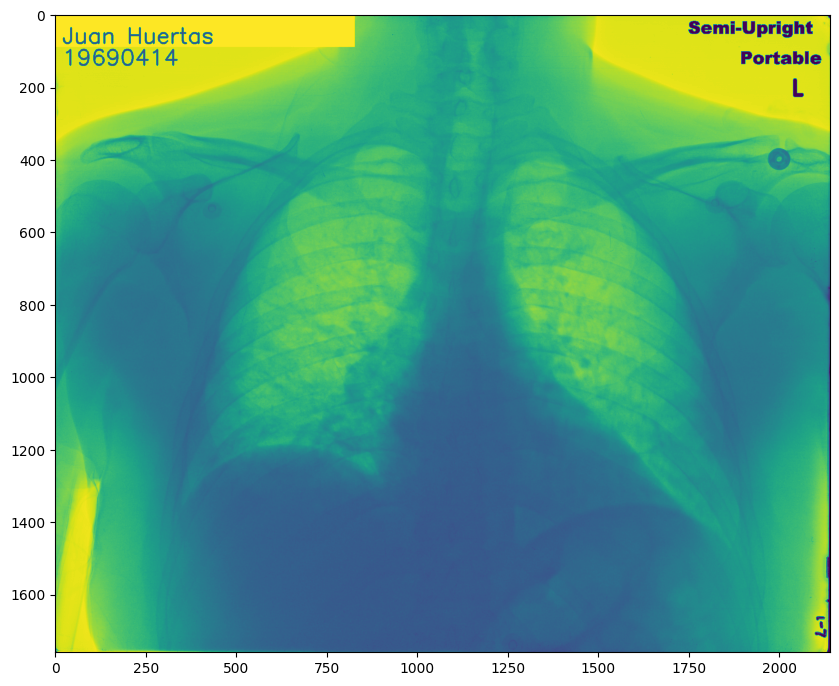

In [61]:
plt.figure(figsize=(10,10))
plt.imshow(dicom_instance.pixel_array)

In [62]:
# Parameters for the second image
second_image = draw_text_on_image_opencv(_dicom_instance.pixel_array, str(_dicom_instance.PatientName), position=(10, 30), font_scale=0.5, font_color=(255, 255, 255), thickness=1)
second_image = draw_text_on_image_opencv(second_image, str(_dicom_instance.PatientBirthDate), position=(10, 50), font_scale=0.5, font_color=(255, 255, 255), thickness=1)

In [63]:
_dicom_instance.PixelData  = second_image.tobytes()

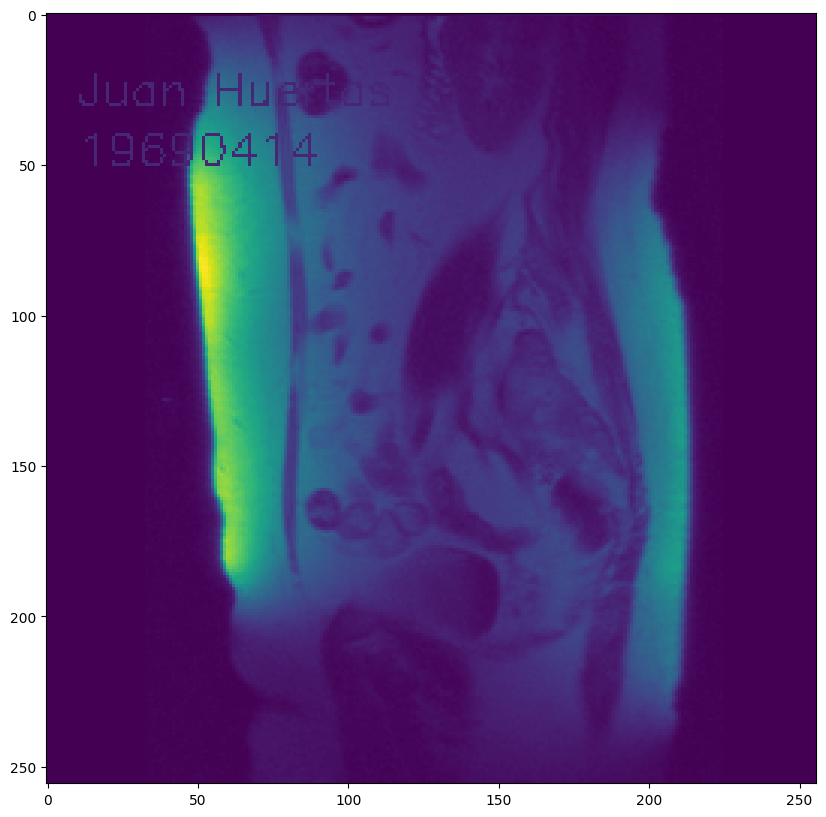

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(_dicom_instance.pixel_array)

In [71]:
position = (20, 80)
font_scale = 2.0
font_color = (0, 0, 0)  # Red (BGR)
thickness = 4
font = cv2.FONT_HERSHEY_SIMPLEX # Change font if desired

In [72]:
#modified_image_array = draw_text_on_image(dicom_instance.pixel_array, str(dicom_instance.PatientName), position, font_size, text_color, font_path)

modified_image_array = draw_text_on_image_opencv(dicom_instance.pixel_array, str(dicom_instance.PatientName), position, font_scale, font_color, thickness, font)

In [73]:
dicom_instance.PixelData  = modified_image_array.tostring()

/tmp/ipykernel_27903/45205219.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  dicom_instance.PixelData  = modified_image_array.tostring()


In [74]:
position = (20, 140)
modified_image_array = draw_text_on_image_opencv(dicom_instance.pixel_array, str(dicom_instance.PatientBirthDate), position, font_scale, font_color, thickness, font)
dicom_instance.PixelData  = modified_image_array.tostring()

/tmp/ipykernel_27903/2655477270.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  dicom_instance.PixelData  = modified_image_array.tostring()


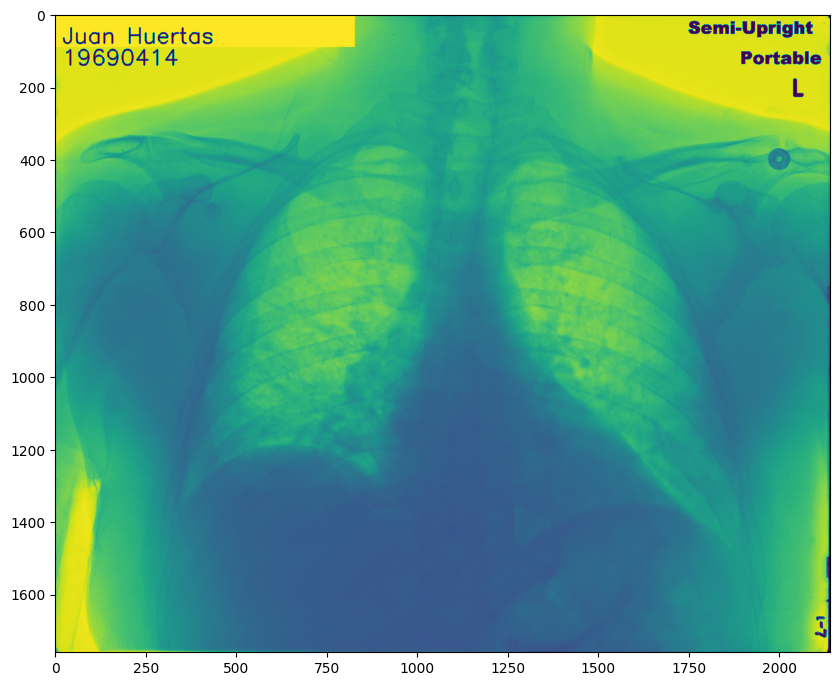

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(dicom_instance.pixel_array)

In [77]:
dicom_instance.save_as("modified_dcm.dcm")

In [170]:
dicom_instance2 = pydicom.dcmread("modified_dcm.dcm")
dicom_instance3 = pydicom.dcmread("1-09.dcm")

In [171]:
dicom_instance3

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 206
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.8700.9668.284248003288848155128558803518
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.8700.9668.28424800328884815

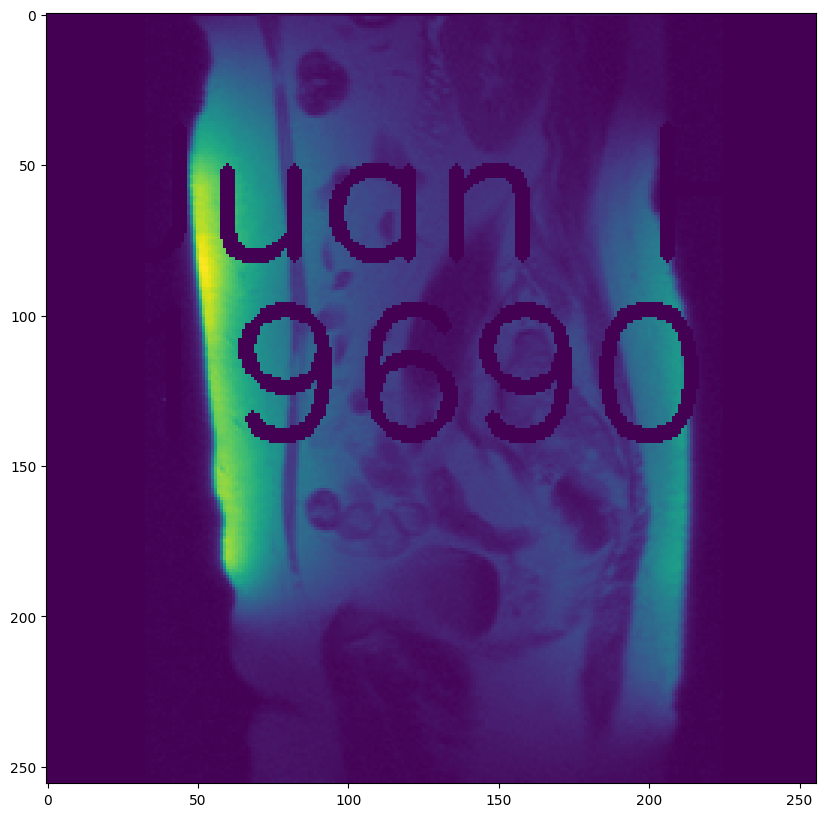

In [172]:
plt.figure(figsize=(10,10))
plt.imshow(dicom_instance3.pixel_array)

In [152]:
dicom_instance3 = pydicom.dcmread("dicom2/0002.DCM")

In [153]:
dicom_instance3

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 150
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: X-Ray Angiographic Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 999.999
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
(0008,0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0008,0020) Study Date                          DA: '19941013'
(0008,0030) Study Time                          TM: '141917'
(0008,0050) Accession Number                    S

In [154]:
list_frames = []
for frame in dicom_instance3.pixel_array:
    modified_image_array = draw_text_on_image_opencv(frame, str(dicom_instance.PatientName), position, 1.0, font_color, thickness, font)
    position = (20, 140)
    modified_image_array = draw_text_on_image_opencv(modified_image_array, str(dicom_instance.PatientBirthDate), position, 1.0, font_color, thickness, font)
    list_frames.append(modified_image_array.tostring())

/tmp/ipykernel_27903/570796494.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  list_frames.append(modified_image_array.tostring())


In [156]:
list_frames = np.array(list_frames)

In [157]:
dicom_instance3.PixelData  = list_frames.tostring()

/tmp/ipykernel_27903/865813506.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  dicom_instance3.PixelData  = list_frames.tostring()


In [158]:
import numpy as np
import cv2

def visualize_array_as_video(array):
    # Create a VideoWriter object
    height, width = array.shape[1], array.shape[2]
    out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, (width, height), isColor=False)

    for i in range(array.shape[0]):
        frame = (array[i] * 255).astype(np.uint8)  # Convert to uint8
        out.write(frame)

    out.release()
    print("Video saved as output.avi")




In [ ]:
visualize_array_as_video(list_frames)

In [145]:
dicom_instance3

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 150
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: X-Ray Angiographic Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 999.999
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
(0008,0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.4.3.321890.19960124.162922.29
(0008,0020) Study Date                          DA: '19941013'
(0008,0030) Study Time                          TM: '141917'
(0008,0050) Accession Number                    S

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(dicom_instance3.pixel_array[0])